In [213]:
pip install -U scikit-learn

In [214]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy

In [215]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [216]:
ls

Dataset.csv  Dataset-with-sentiments.csv  sample_data/


In [217]:
data = pd.read_csv("Dataset.csv")

In [218]:
data.head()

,Video ID,Comment ID,comments,Likes
0,Jkj36B1YuDU,Ugzw2beVeZqddzqNvL54AaABAg,Have you found your love,36784
1,Jkj36B1YuDU,Ugz_Wy-18rH_Nu4QHZZ4AaABAg,It's th November let's see how m...,677
2,Jkj36B1YuDU,UgzFl7VdxMJsktBLDst4AaABAg,It's th November let's see how man...,1033
3,Jkj36B1YuDU,UgwG5dj5E_aot-1jMkB4AaABAg,It's th October let's see how many...,2359
4,Jkj36B1YuDU,UgyG7pKSxF44WOrQ7aV4AaABAg,promise me this is forever I pro...,299


In [219]:
data.shape

(1476, 4)

In [220]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [221]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity
0,Jkj36B1YuDU,Ugzw2beVeZqddzqNvL54AaABAg,Have you found your love,36784,0.5
1,Jkj36B1YuDU,Ugz_Wy-18rH_Nu4QHZZ4AaABAg,It's th November let's see how m...,677,0.5
2,Jkj36B1YuDU,UgzFl7VdxMJsktBLDst4AaABAg,It's th November let's see how man...,1033,0.5
3,Jkj36B1YuDU,UgwG5dj5E_aot-1jMkB4AaABAg,It's th October let's see how many...,2359,0.5
4,Jkj36B1YuDU,UgyG7pKSxF44WOrQ7aV4AaABAg,promise me this is forever I pro...,299,0.0


## Shuffle the dataset

In [222]:
data = data.sample(frac=1).reset_index(drop=True)

In [223]:
data['pol_cat']  = 0

Continuous to categorical

In [224]:
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [225]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,Jkj36B1YuDU,Ugyq7GPVNGQh5QGV9cN4AaABAg,Words They always win but know ...,67,0.520000,1
1,Jkj36B1YuDU,Ugx6V3h9OR8KAoXm3NV4AaABAg,I found them they were the one right n...,0,0.314286,1
2,Jkj36B1YuDU,UgyGCIzBO8lVVDKNV_t4AaABAg,Another love,0,0.500000,1
3,Jkj36B1YuDU,UgwOWZJ-IvR_0w8q_4h4AaABAg,I don't want to die I want to be...,362,0.000000,0
4,Jkj36B1YuDU,UgweDHli5z17n0NM5Wt4AaABAg,I stil can't find my love,0,0.500000,1


In [226]:
data['pol_cat'].value_counts()

0    741
1    735
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [227]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == 0]
data_neg = data_neg.reset_index(drop = True)

In [228]:
data_pos.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,Jkj36B1YuDU,Ugyq7GPVNGQh5QGV9cN4AaABAg,Words They always win but know ...,67,0.520000,1
1,Jkj36B1YuDU,Ugx6V3h9OR8KAoXm3NV4AaABAg,I found them they were the one right n...,0,0.314286,1
2,Jkj36B1YuDU,UgyGCIzBO8lVVDKNV_t4AaABAg,Another love,0,0.500000,1
3,Jkj36B1YuDU,UgweDHli5z17n0NM5Wt4AaABAg,I stil can't find my love,0,0.500000,1
4,Jkj36B1YuDU,UgzmZyV-qjSOIfR75LN4AaABAg,Guys i found my love,0,0.500000,1


In [229]:
data_pos.shape

(735, 6)

In [230]:
data_neg.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat
0,Jkj36B1YuDU,UgwOWZJ-IvR_0w8q_4h4AaABAg,I don't want to die I want to be...,362,0.0,0
1,Jkj36B1YuDU,UgzcGzMLXhiNobWO8i14AaABAg,My fovorite music O,0,0.0,0
2,Jkj36B1YuDU,UgyCzt51NxPVoDn6ddZ4AaABAg,Why isn t anyone talking about this son...,960,0.0,0
3,Jkj36B1YuDU,UgywtO850gkmMPINH9x4AaABAg,I'm crying,1,-0.2,0
4,Jkj36B1YuDU,Ugx_ARz5mZkU2UAZujp4AaABAg,Yes but not anymore but when I look i ...,1,0.0,0


In [231]:
data_neg['comments'][1]

'My  fovorite  music        O'

0    741
1    735
Name: pol_cat, dtype: int64

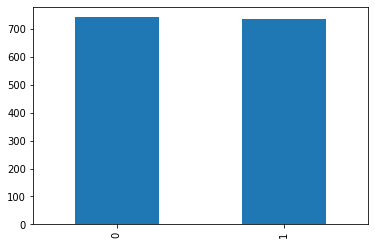

In [232]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [233]:
data['comments'] = data['comments'].str.lower()

In [234]:
data['comments'].head()

0    words    they  always  win    but      know   ...
1    i  found  them  they  were  the  one  right  n...
2                                      another  love  
3    i  don't  want  to  die        i  want  to  be...
4                       i  stil  can't  find  my  love
Name: comments, dtype: object

In [235]:
data.describe()

,Likes,polarity,pol_cat
count,1476.000000,1476.000000,1476.000000
mean,389.159892,0.171113,0.497967
std,2774.849702,0.323529,0.500165
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,26.000000,0.500000,1.000000
max,67111.000000,1.000000,1.000000


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    1476 non-null   object 
 1   Comment ID  1476 non-null   object 
 2   comments    1476 non-null   object 
 3   Likes       1476 non-null   int64  
 4   polarity    1476 non-null   float64
 5   pol_cat     1476 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 69.3+ KB


In [237]:
data['comments'][0]

'words    they  always  win    but      know      gonna  lose        i  love  this  sentence  very  much    this  song  is  a  masterpiece      '

In [238]:
data['comments'][0].strip()

'words    they  always  win    but      know      gonna  lose        i  love  this  sentence  very  much    this  song  is  a  masterpiece'

In [239]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [240]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [241]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [242]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [243]:
stop_words = set(stopwords.words('english'))

In [244]:
data['comments'] = data['comments'].str.strip()

In [245]:
train = data.copy()

In [246]:
train['comments'] = train['comments'].str.strip()

In [247]:
train['comments'][0]

'words    they  always  win    but      know      gonna  lose        i  love  this  sentence  very  much    this  song  is  a  masterpiece'

In [248]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [249]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [250]:
data.head()

,Video ID,Comment ID,comments,Likes,polarity,pol_cat,stop_comments
0,Jkj36B1YuDU,Ugyq7GPVNGQh5QGV9cN4AaABAg,words they always win but know ...,67,0.520000,1,words always win know gon na lose love sentenc...
1,Jkj36B1YuDU,Ugx6V3h9OR8KAoXm3NV4AaABAg,i found them they were the one right n...,0,0.314286,1,found one right next whole time right never no...
2,Jkj36B1YuDU,UgyGCIzBO8lVVDKNV_t4AaABAg,another love,0,0.500000,1,another love
3,Jkj36B1YuDU,UgwOWZJ-IvR_0w8q_4h4AaABAg,i don't want to die i want to be...,362,0.000000,0,n't want die want mikasa want everyone
4,Jkj36B1YuDU,UgweDHli5z17n0NM5Wt4AaABAg,i stil can't find my love,0,0.500000,1,stil ca n't find love


In [251]:
data.to_csv('Dataset-with-sentiments.csv', index = False)